# Voting Ensemble

In [2]:
import pandas as pd
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
      
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
df=  pd.read_csv(csv_url, names = col_names)

In [3]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder=LabelEncoder()

In [7]:
df['Class']=encoder.fit_transform(df['Class'])

In [8]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


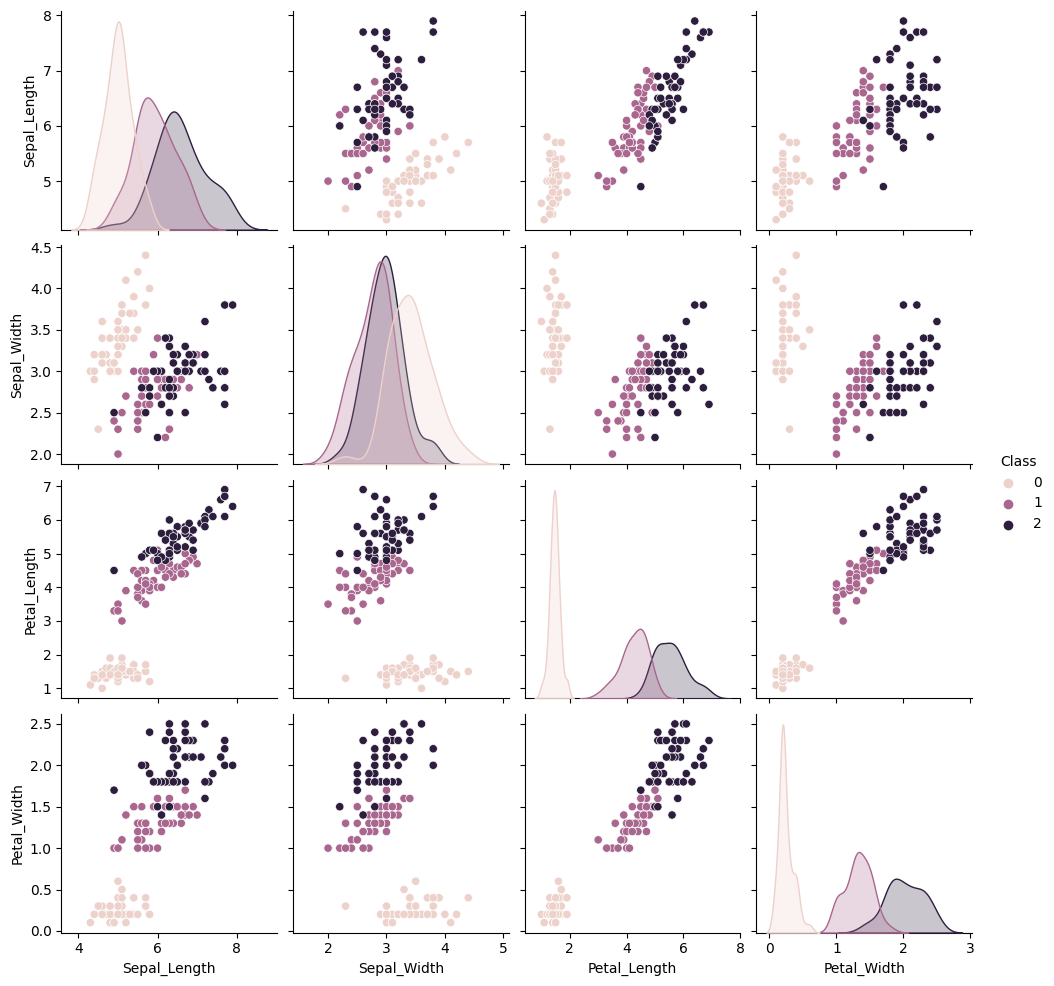

In [9]:
import seaborn as sns
sns.pairplot(df,hue='Class')

In [19]:
pip install seaborn


     ------------------------------------ 293.3/293.3 kB 788.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


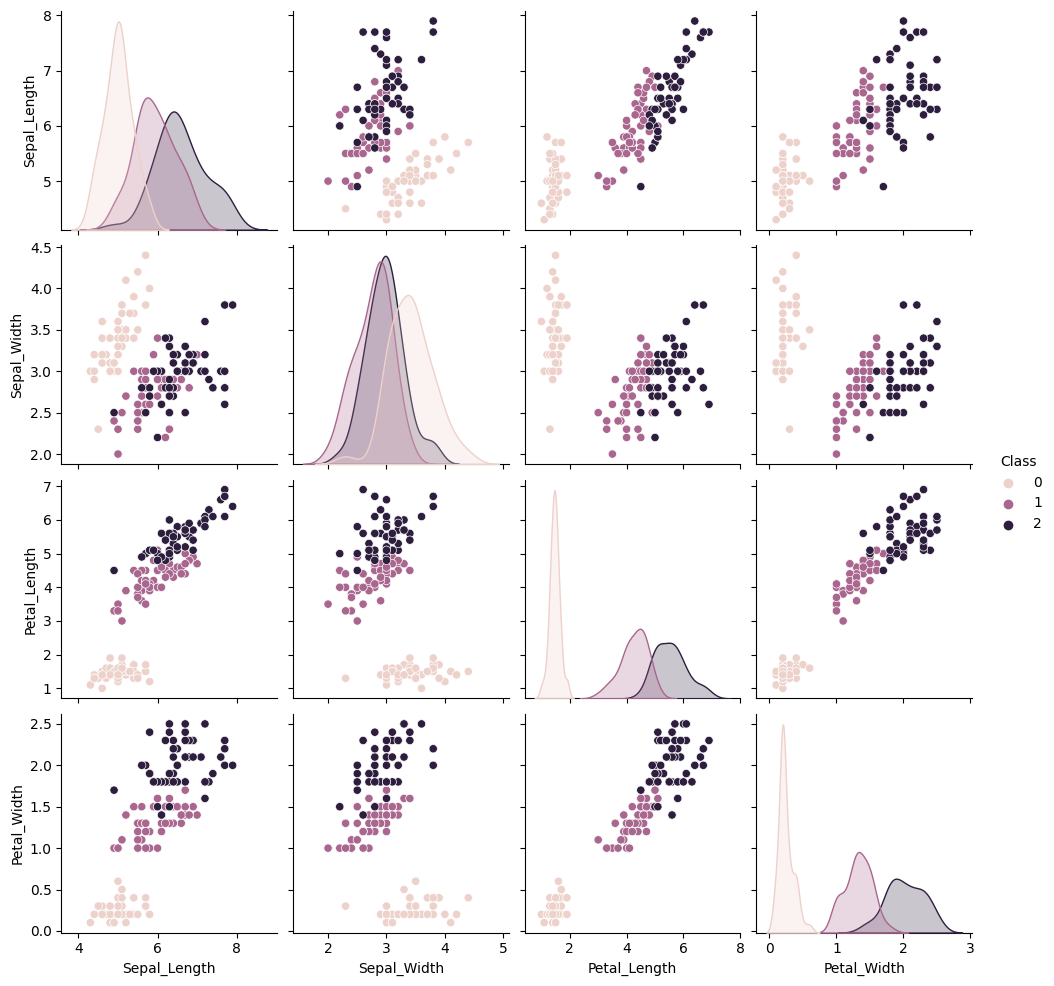

In [20]:
import seaborn as sns
sns.pairplot(df,hue='Class')

In [23]:
new_df = df[df['Class'] != 0][['Sepal_Length','Sepal_Width','Class']]

In [25]:
new_df.head()

,Sepal_Length,Sepal_Width,Class
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [26]:
new_df.shape

(100, 3)

In [27]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
X.head()

,Sepal_Length,Sepal_Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [32]:
y.head(4)

0    0
1    0
2    0
3    0
Name: Class, dtype: int32

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [36]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [38]:
import numpy as np

In [39]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.72
knn 0.76


In [40]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [41]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# Soft Voting

In [42]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.76


In [43]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.76
for i=1,j=1,k=3 0.76
for i=1,j=2,k=1 0.77
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.77
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.77
for i=1,j=3,k=3 0.77
for i=2,j=1,k=1 0.77
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.77
for i=2,j=2,k=1 0.77
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.77
for i=2,j=3,k=1 0.74
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.8
for i=3,j=1,k=2 0.78
for i=3,j=1,k=3 0.79
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.77
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.75
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.77


# Classifiers of Same Algo

In [46]:
from sklearn.svm import SVC

In [47]:

from sklearn.datasets import make_classification

In [48]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [53]:
type(X)

numpy.ndarray

In [49]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

In [50]:
estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

In [51]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [52]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


In [54]:
df1=pd.DataFrame(X)

In [55]:
df2=pd.DataFrame(y)

In [58]:
df3=df1+df2

In [60]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5.888918,2.648677,-0.427282,-1.249889,-0.008220,-3.578956,2.879384,-1.556147,-0.381688,7.502857,-1.167104,-5.024927,-0.461961,-0.645395,-1.712975,0.259879,-0.193401,-5.520230,0.036445,-1.960039
1,6.975177,3.014675,2.000897,0.557815,0.159958,-0.817575,1.108405,-0.028593,1.159069,9.273757,-3.660832,-6.478685,-0.258291,3.646026,-15.553557,-4.270470,-4.772893,-0.835968,4.477085,-1.939545
2,4.759917,-0.552213,2.851518,0.093950,2.256110,-1.154848,0.847716,2.923864,-1.936581,-9.438027,-7.021135,4.337977,6.974793,4.912563,-3.824232,0.241068,-2.040525,5.516562,1.016374,1.991416
3,8.137699,3.760829,-1.262425,2.987589,-3.036488,-4.849870,-0.486203,0.043232,-1.524782,-0.094029,0.915260,1.197706,-4.501813,3.606469,-7.511954,1.922361,4.086477,-4.477092,-0.181887,-1.493881
4,-15.190690,-2.274786,5.796417,-3.688002,-1.238770,3.762332,-1.655036,-4.581967,-2.566822,4.352088,4.705019,5.081320,5.885995,1.407396,5.495262,-1.329416,-0.469716,4.547520,0.899793,-0.775051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.399060,-3.540934,4.846663,3.280475,-3.270614,1.207431,2.522916,0.431753,0.253988,-8.485211,-1.241592,15.330907,13.112111,-0.978886,2.576279,2.580571,3.646823,1.443395,-1.890753,-2.028950
996,-2.336025,1.115315,1.482014,-0.573641,-0.269424,-2.192148,-0.224534,4.325767,-2.824789,1.876494,-1.726073,1.234791,-5.037622,0.170398,0.213757,-2.402589,2.334406,-0.272121,0.318755,0.498233
997,-3.400901,-1.078975,6.816798,-3.463336,-4.532132,-3.029690,-7.340757,3.429834,-4.890922,-1.072530,0.234152,4.634171,2.123054,3.759221,0.691647,0.054614,3.085977,-2.323360,-5.118138,-0.377262
998,-0.712936,-1.676745,0.154603,0.210093,1.356895,0.194012,0.065681,-1.013436,-0.631426,-2.005832,-0.748611,3.845767,3.478802,-2.385662,6.270038,0.958228,2.285000,1.907686,-0.914560,-3.133158


In [61]:
import matplotlib.pyplot as plt

TypeError: scatter() missing 1 required positional argument: 'y'